# Pandas II

#### Written for the QuantEcon Indian Summer Workshop (August 2022)
#### Author: [Shu Hu](https://shu-hu.com/intro.html)

With some imports:

In [1]:
!pip install --upgrade pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's consider the following dataframe ``df``.

In [3]:
url = "https://datascience.quantecon.org/assets/data/bball.csv"
df = pd.read_csv(url)

In [4]:
df

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


### Exercise 1 (Merge vs Group)

Given two dataframes ``df1`` and ``df2``.

In [5]:
df1 = df[0:3]
df2 = df[3:]

In [6]:
df1

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1


In [7]:
df2

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


### Exercise 1.1 (Merge: concat)

Concatenate ``df1`` and ``df2`` together.

### Solution

In [8]:
dfs = [df1, df2]
pd.concat(dfs)

,Year,Player,Team,TeamName,Games,Pts,Assist,Rebound
0,2015,Curry,GSW,Warriors,79,30.1,6.7,5.4
1,2016,Curry,GSW,Warriors,79,25.3,6.6,4.5
2,2017,Curry,GSW,Warriors,51,26.4,6.1,5.1
3,2015,Durant,OKC,Thunder,72,28.2,5.0,8.2
4,2016,Durant,GSW,Warriors,62,25.1,4.8,8.3
5,2017,Durant,GSW,Warriors,68,26.4,5.4,6.8
6,2015,Ibaka,OKC,Thunder,78,12.6,0.8,6.8
7,2016,Ibaka,ORL,Magic,56,15.1,1.1,6.8
8,2016,Ibaka,TOR,Raptors,23,14.2,0.7,6.8


### Exercise 1.2 (Group)

Group the dataframe ``df`` by column ``Player`` and apply the ``sum()`` function to the resulting groups.

### Solution

In [9]:
df.groupby("Player").sum()

,Year,Games,Pts,Assist,Rebound
Player,,,,,
Curry,6048,209,81.8,19.4,15.0
Durant,6048,202,79.7,15.2,23.3
Ibaka,6047,157,41.9,2.6,20.4


### Exercise 1.3 (Group)

Group the dataframe ``df`` by column ``Player`` and apply ``mean()`` function to the resulting groups.

### Solution

In [10]:
df.groupby("Player").mean()

,Year,Games,Pts,Assist,Rebound
Player,,,,,
Curry,2016.000000,69.666667,27.266667,6.466667,5.000000
Durant,2016.000000,67.333333,26.566667,5.066667,7.766667
Ibaka,2015.666667,52.333333,13.966667,0.866667,6.800000


### Exercise 2

Please read the following QuantEcon lecture before starting:
- https://python-programming.quantecon.org/pandas.html

From reading we know that we can use [pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/) to access online data.

In [11]:
from pandas_datareader import wb

### Exercise 2.1

Use [wb.search()](https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html?highlight=search#pandas_datareader.wb.search) method to find the Gross Domestic Products per capita in constant 2015 US$.

(Hint: use keywords, such as ``GDP`` or ``capita``.)

### Solution

In [12]:
matches = wb.search('gdp.*capita.*const.*2015')

In [13]:
matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
10522,NY.GDP.PCAP.KD,GDP per capita (constant 2015 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth


The series ``id`` is ``NY.GDP.PCAP.KD``.

### Exercise 2.2
Using the id you obtained from Exercise 2.1 to acquire GDP per capita data 
- for countries US (``US``), Australia (``AU``) and India (``IN``)
- from year 2000 to 2022,

and store the data in a dataframe called ``dat``.

### Solution

In [14]:
dat = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'AU', 'IN'], start=2000, end=2022)

In [15]:
dat

NY.GDP.PCAP.KD
country       year                
Australia     2021    58780.333061
              2020    58029.515526
              2019    58781.046657
              2018    58447.252651
              2017    57695.571259
...                            ...
United States 2004    51485.207412
              2003    50036.234235
              2002    49095.331799
              2001    48726.581673
              2000    48746.040960

[66 rows x 1 columns]

### Exercise 2.3

Calculate the average GDP per capita for these three countries, respectively, over the period.

(HINT. Use ``.groupby`` from Exercise 1.)

### Solution

In [16]:
dat['NY.GDP.PCAP.KD'].groupby(level=0).mean()

country
Australia        53504.849557
India             1317.328373
United States    54442.900265
Name: NY.GDP.PCAP.KD, dtype: float64

### Exercise 2.4

Plot the GDP per capita from 2000 to 2022 as time series for the three countries.

### Solution

In [17]:
dat_n = dat.reset_index()
dat_n = dat_n.sort_values(by="year", ascending=True)

In [18]:
dat_n

,country,year,NY.GDP.PCAP.KD
65,United States,2000,48746.040960
43,India,2000,757.668747
21,Australia,2000,45558.753131
42,India,2001,780.606234
20,Australia,2001,45864.768033
...,...,...,...
45,United States,2020,58060.313948
1,Australia,2020,58029.515526
22,India,2021,1961.421031
44,United States,2021,61280.389602


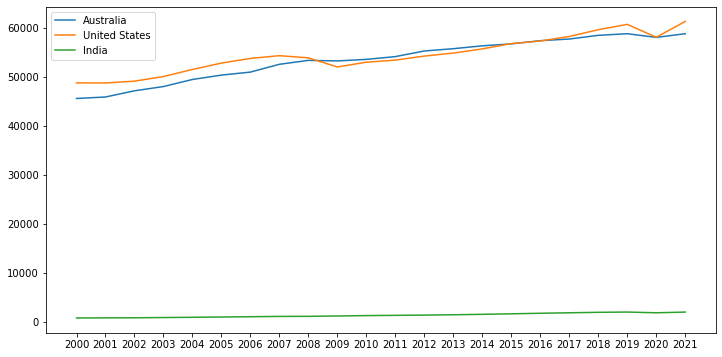

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))

countries = ["Australia", "United States", "India"]
year = "year"
ID = "NY.GDP.PCAP.KD"

for i in range(len(countries)):
    ax.plot(year, ID, data=dat_n[dat_n["country"] == countries[i]], label=countries[i])


plt.legend()
plt.show()

## Exercise 3 (Climate change vs GDP growth)

Next let's compare GDP per capita to the share of Droughts, floods, extreme temperatures around the world.

### Exercise 3.1

Use [wb.search()](https://pandas-datareader.readthedocs.io/en/latest/readers/world-bank.html?highlight=search#pandas_datareader.wb.search) method to find the share of Droughts, floods, extreme temperatures.

### Solution

In [20]:
d = wb.search('temperature.*%')
d

,id,name,unit,source,sourceNote,sourceOrganization,topics
6045,EN.CLC.MDAT.ZS,"Droughts, floods, extreme temperatures (% of p...",,World Development Indicators,"Droughts, floods and extreme temperatures is t...",b'EM-DAT: The OFDA/CRED International Disaster...,Climate Change ; Environment


In [21]:
d.iloc[:, 4]

6045    Droughts, floods and extreme temperatures is t...
Name: sourceNote, dtype: object

### Exercise 3.2 

Acquire the GDP per capita and the share of extreme weather for **ALL** available countries in year 2009 using ``id``s from Exercises 2.1 and 3.1.

Store the acquired data in a dataframe called ``df`` and name the columns by ``gdp`` and ``eweather``, respectively.

### Solution

In [22]:
ind = ['NY.GDP.PCAP.KD', 'EN.CLC.MDAT.ZS']
df = wb.download(indicator=ind, country='all', start=2009, end=2009).dropna()

In [23]:
df.columns = ['gdp', 'eweather']

In [24]:
df

,,gdp,eweather
country,year,,
Afghanistan,2009,472.842292,1.059290
Albania,2009,3432.169973,5.269577
Algeria,2009,3851.213777,0.039223
American Samoa,2009,12092.276506,0.000262
Angola,2009,2962.446816,1.011765
...,...,...,...
Uzbekistan,2009,2037.581498,0.123694
Vanuatu,2009,2893.465354,0.105704
Vietnam,2009,1913.328394,1.599362


Here a higher value in the column ``eweather`` means that the corresponding country experienced more extreme weather situations.

### Exercise 3.3 

Use the [statsmodels](https://www.statsmodels.org/stable/regression.html) package to assess the relation between ``gdp`` and ``eweather`` using ordinary least squares regression.

In [25]:
import statsmodels.formula.api as sm

### Solution

In [26]:
wog = sm.ols('eweather ~ np.log(gdp)', df).fit()

In [27]:
print(wog.summary())

                            OLS Regression Results                            
Dep. Variable:               eweather   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     31.33
Date:                Thu, 04 Aug 2022   Prob (F-statistic):           9.13e-08
Time:                        09:00:40   Log-Likelihood:                -323.41
No. Observations:                 164   AIC:                             650.8
Df Residuals:                     162   BIC:                             657.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.7059      0.832      6.858      